In [1]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

    
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Loading the dataset and visualize first five records
df1 = pd.read_csv('229350N-Psychological_Wellbeing_in_IT_Organization_Survey_Results.csv')
df1.head()

,Unnamed: 0,Timestamp,Age,Gender,Monthly salary,Highest level of Education,Civil status,Employment type,Working experience,Working hours,Living arrangement for last month,Occupation of the spouse,Properties owned by you and your family (multiple choice),Living location,Working arrangement,Travel distance from home to workplace (Only answer if you are travelling to work place),Type of the traveling mode,Interpersonal Fit at Work [I value the people I work with.],Interpersonal Fit at Work [I enjoy working with the people at my job.],Interpersonal Fit at Work [I get along well with the people at my job.],Interpersonal Fit at Work [I have a relationship of trust with the people at my job.],Thriving at work [I find my job exciting.],Thriving at work [I like my job.],Thriving at work [I am proud of the job I have.],Thriving at work [I find meaning in my work.],Feeling of Competency at work [I know I am capable of doing my job.],Feeling of Competency at work [I feel confident at work.],Feeling of Competency at work [I feel effective and competent in my work.],Perceived Recognition at work [I feel that my work is recognized.],Perceived Recognition at work [I feel that my work efforts are appreciated.],Perceived Recognition at work [I feel that the people I work with recognize my abilities],Desire for Involvement at work [I want to take initiative in my work.],Desire for Involvement at work [ I care about the good functioning of my organization.],Desire for Involvement at work [ I want to contribute to achieving the goals of my organization.]
0,0,18/07/2022 20:09:47,26 - 30 years,Female,"Rs 100,000 - Rs 200,000",Bachelor's Degree,Single,Full-time,Below 2 years,8 to 10 hr,Living with parents,No married,"Own a house, Own a land (w/o house)",Gampaha District,Online,NaN,NaN,5,5,5,5,4,4,5,5,5,5,5,5,5,5.0,4,4,5
1,1,18/07/2022 20:18:53,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,"A vehicle (car/van), Own a house",Other province,Online,Above 100km,Working from home,4,3,1,4,4,4,4,4,4,4,4,4,4,4.0,4,4,4
2,2,18/07/2022 20:51:45,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,"A Motorbike, Own a house",Other province,Online,NaN,Working from home,4,4,4,4,4,4,4,4,4,4,4,4,4,4.0,4,4,4
3,3,18/07/2022 20:54:09,20 - 25 years,Male,"Below Rs.100,000",Bachelor's Degree,Single,Internship,Below 2 years,8 to 10 hr,Living with parents,Not working,A Motorbike,Gampaha District,Hybrid,11km-25km,Public transport,4,3,5,4,4,4,4,4,4,4,5,3,4,4.0,4,5,5
4,4,18/07/2022 21:02:20,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,"Own a house, Own a land (w/o house)",Gampaha District,Online,NaN,NaN,4,5,4,5,4,3,5,5,4,4,4,4,5,5.0,3,4,4


In [4]:
df1.columns

Index(['Unnamed: 0', 'Timestamp', 'Age', 'Gender', 'Monthly salary',
       'Highest level of Education', 'Civil status', 'Employment type',
       'Working experience', 'Working hours',
       'Living arrangement for last month', 'Occupation of the spouse',
       'Properties owned by you and your family (multiple choice)',
       'Living location', 'Working arrangement',
       'Travel distance from home to workplace (Only answer if you are travelling to work place)',
       'Type of the traveling mode',
       'Interpersonal Fit at Work [I value the people I work with.]',
       'Interpersonal Fit at Work [I enjoy working with the people at my job.]',
       'Interpersonal Fit at Work [I get along well with the people at my job.]',
       'Interpersonal Fit at Work [I have a relationship of trust with the people at my job.]',
       'Thriving at work  [I find my job exciting.]',
       'Thriving at work  [I like my job.]',
       'Thriving at work  [I am proud of the job I have.]',


In [5]:
columns_list_interpersonal_fit = ['Interpersonal Fit at Work [I value the people I work with.]',
                                 'Interpersonal Fit at Work [I enjoy working with the people at my job.]',
                                 'Interpersonal Fit at Work [I get along well with the people at my job.]',
                                 'Interpersonal Fit at Work [I have a relationship of trust with the people at my job.]']

In [6]:
df1['interpersonal_fit_score'] = df1[columns_list_interpersonal_fit].sum(axis=1)/4

In [7]:
columns_list_perceived_recognition = ['Perceived Recognition at work [I feel that my work is recognized.]',
                                     'Perceived Recognition at work [I feel that my work efforts are appreciated.]',
                                     'Perceived Recognition at work [I feel that the people I work with recognize my abilities]']

In [8]:
df1['perceived_recognition'] = df1[columns_list_perceived_recognition].sum(axis=1)/3

In [9]:
column_list_desire_for_involvement = ['Desire for Involvement at work [I want to take initiative in my work.]',
                                      'Desire for Involvement at work [ I care about the good functioning of my organization.]',
                                      'Desire for Involvement at work [ I want to contribute to achieving the goals of my organization.]']

In [10]:
df1['desire_for_involvement'] = df1[column_list_desire_for_involvement].sum(axis=1)/3

In [11]:
df1['thriving_score'] = df1[['Thriving at work  [I find my job exciting.]',
       'Thriving at work  [I like my job.]',
       'Thriving at work  [I am proud of the job I have.]',
       'Thriving at work  [I find meaning in my work.]']].sum(axis=1)/4


In [12]:
df1['competency_score'] = df1[['Feeling of Competency at work [I know I am capable of doing my job.]',
       'Feeling of Competency at work [I feel confident at work.]',
       'Feeling of Competency at work [I feel effective and competent in my work.]']].sum(axis=1)/3


In [13]:
df1.head()

,Unnamed: 0,Timestamp,Age,Gender,Monthly salary,Highest level of Education,Civil status,Employment type,Working experience,Working hours,Living arrangement for last month,Occupation of the spouse,Properties owned by you and your family (multiple choice),Living location,Working arrangement,Travel distance from home to workplace (Only answer if you are travelling to work place),Type of the traveling mode,Interpersonal Fit at Work [I value the people I work with.],Interpersonal Fit at Work [I enjoy working with the people at my job.],Interpersonal Fit at Work [I get along well with the people at my job.],Interpersonal Fit at Work [I have a relationship of trust with the people at my job.],Thriving at work [I find my job exciting.],Thriving at work [I like my job.],Thriving at work [I am proud of the job I have.],Thriving at work [I find meaning in my work.],Feeling of Competency at work [I know I am capable of doing my job.],Feeling of Competency at work [I feel confident at work.],Feeling of Competency at work [I feel effective and competent in my work.],Perceived Recognition at work [I feel that my work is recognized.],Perceived Recognition at work [I feel that my work efforts are appreciated.],Perceived Recognition at work [I feel that the people I work with recognize my abilities],Desire for Involvement at work [I want to take initiative in my work.],Desire for Involvement at work [ I care about the good functioning of my organization.],Desire for Involvement at work [ I want to contribute to achieving the goals of my organization.],interpersonal_fit_score,perceived_recognition,desire_for_involvement,thriving_score,competency_score
0,0,18/07/2022 20:09:47,26 - 30 years,Female,"Rs 100,000 - Rs 200,000",Bachelor's Degree,Single,Full-time,Below 2 years,8 to 10 hr,Living with parents,No married,"Own a house, Own a land (w/o house)",Gampaha District,Online,NaN,NaN,5,5,5,5,4,4,5,5,5,5,5,5,5,5.0,4,4,5,5.0,5.000000,4.333333,4.50,5.000000
1,1,18/07/2022 20:18:53,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,"A vehicle (car/van), Own a house",Other province,Online,Above 100km,Working from home,4,3,1,4,4,4,4,4,4,4,4,4,4,4.0,4,4,4,3.0,4.000000,4.000000,4.00,4.000000
2,2,18/07/2022 20:51:45,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,"A Motorbike, Own a house",Other province,Online,NaN,Working from home,4,4,4,4,4,4,4,4,4,4,4,4,4,4.0,4,4,4,4.0,4.000000,4.000000,4.00,4.000000
3,3,18/07/2022 20:54:09,20 - 25 years,Male,"Below Rs.100,000",Bachelor's Degree,Single,Internship,Below 2 years,8 to 10 hr,Living with parents,Not working,A Motorbike,Gampaha District,Hybrid,11km-25km,Public transport,4,3,5,4,4,4,4,4,4,4,5,3,4,4.0,4,5,5,4.0,3.666667,4.666667,4.00,4.333333
4,4,18/07/2022 21:02:20,26 - 30 years,Male,"Rs 200,001 - Rs 500,000",Master's Degree,Single,Full-time,2- 5 years,8 to 10 hr,Living with parents,No married,"Own a house, Own a land (w/o house)",Gampaha District,Online,NaN,NaN,4,5,4,5,4,3,5,5,4,4,4,4,5,5.0,3,4,4,4.5,4.666667,3.666667,4.25,4.000000


array([[<AxesSubplot:title={'center':'interpersonal_fit_score'}>]],
      dtype=object)

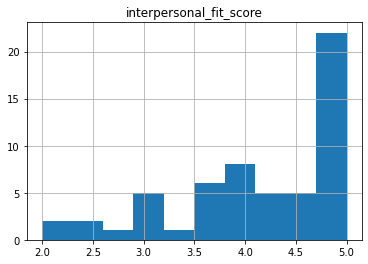

In [14]:
df1.hist(column='interpersonal_fit_score')

array([[<AxesSubplot:title={'center':'perceived_recognition'}>]],
      dtype=object)

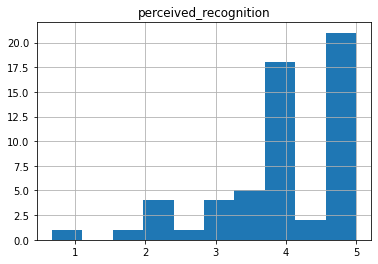

In [15]:
df1.hist(column='perceived_recognition')

array([[<AxesSubplot:title={'center':'desire_for_involvement'}>]],
      dtype=object)

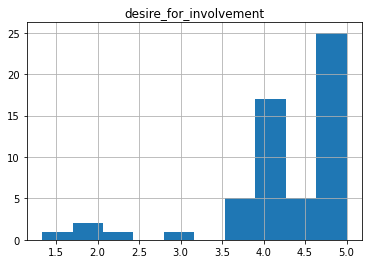

In [16]:
df1.hist(column='desire_for_involvement')

array([[<AxesSubplot:title={'center':'thriving_score'}>]], dtype=object)

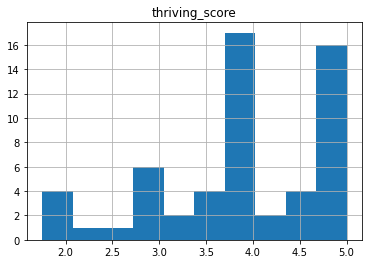

In [17]:
df1.hist(column='thriving_score')

array([[<AxesSubplot:title={'center':'competency_score'}>]], dtype=object)

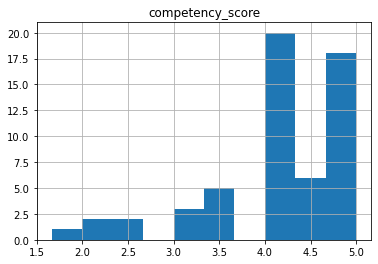

In [18]:
df1.hist(column='competency_score')

In [19]:
groupbyAge= df1.groupby(['Age']).mean().iloc[:,-5:]

In [20]:
groupbyAgei =groupbyAge  #.reset_index()  

In [21]:
groupbyAgei

,interpersonal_fit_score,perceived_recognition,desire_for_involvement,thriving_score,competency_score
Age,,,,,
20 - 25 years,4.038462,3.820513,4.230769,4.096154,3.974359
26 - 30 years,4.203488,4.023256,4.201550,3.906977,4.085271
31 - 40 years,4.000000,5.000000,4.666667,3.250000,4.333333


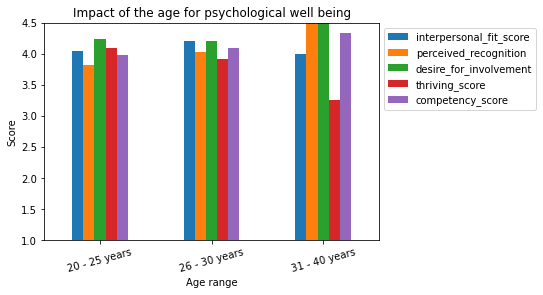

In [22]:
import matplotlib.pyplot as plot

groupbyAgei.plot(kind="bar",rot=15, title="Impact of the age for psychological well being").legend(bbox_to_anchor=(1.0, 1.0))

plot.xlabel("Age range")
plot.ylabel("Score")
plot.ylim([1, 4.5])

plot.show(block=True);

In [23]:
def plotData(feature): 
    #feature = 'Gender'
    groupby= df1.groupby([feature]).mean().iloc[:,-5:]
    groupbyi =groupby  #.reset_index()  

    import matplotlib.pyplot as plot

    groupbyi.plot(kind="bar",rot=15, title=f"Impact of the {feature} for psychological well being").legend(bbox_to_anchor=(1.0, 1.0))

    plot.xlabel(feature)
    plot.ylabel("Score")
    plot.ylim([1, 5])

    plot.show(block=True);


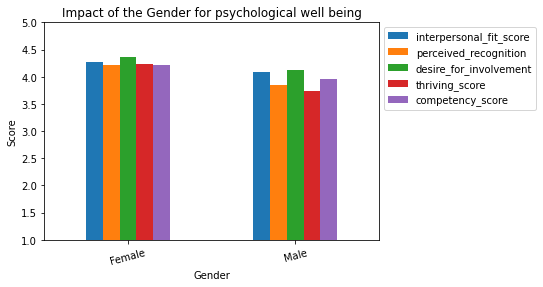

In [24]:
plotData('Gender')

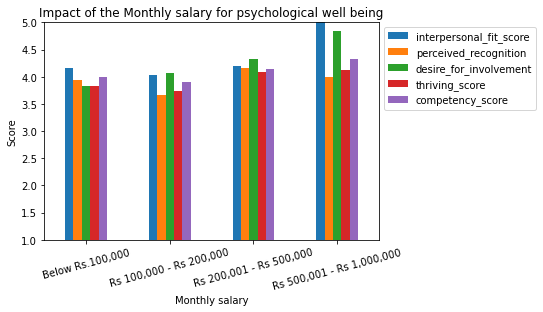

In [25]:
plotData('Monthly salary')

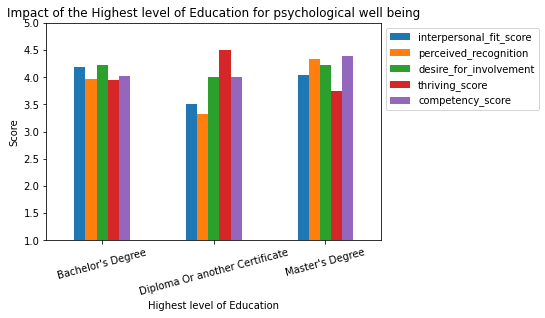

In [26]:
plotData('Highest level of Education')

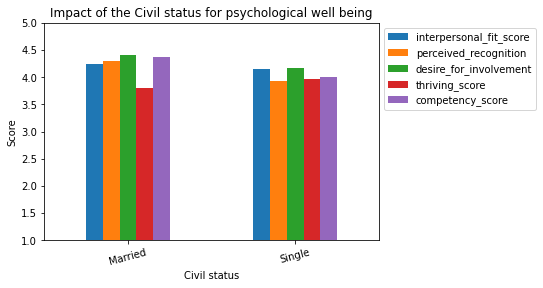

In [27]:
plotData('Civil status')

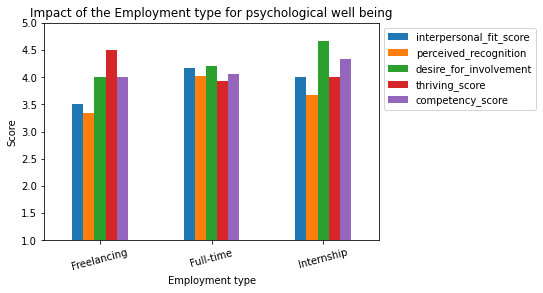

In [28]:
plotData('Employment type')

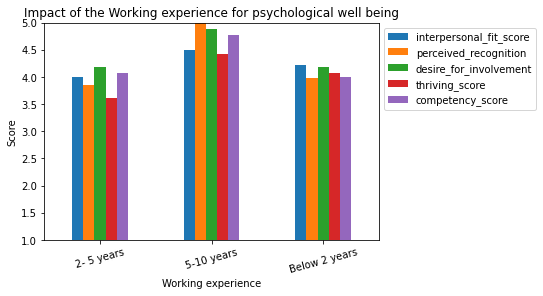

In [29]:
plotData('Working experience')

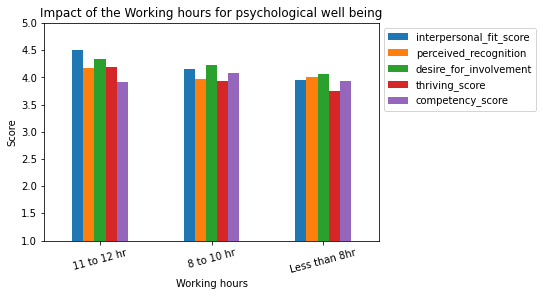

In [30]:
plotData('Working hours')

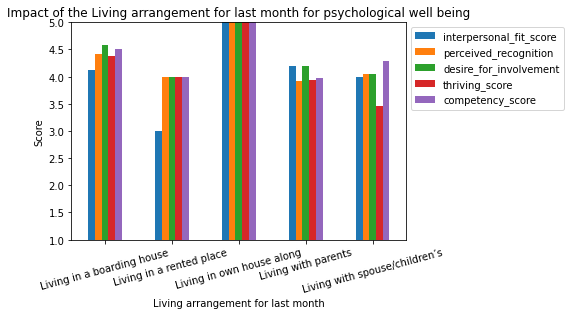

In [31]:
plotData('Living arrangement for last month')

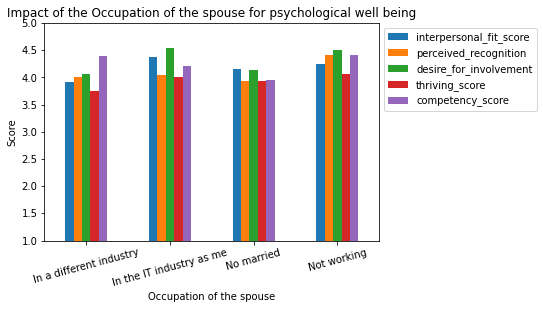

In [32]:
plotData('Occupation of the spouse')

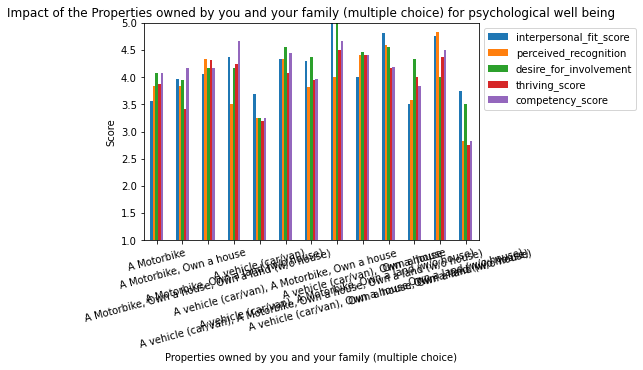

In [33]:
plotData('Properties owned by you and your family (multiple choice)')

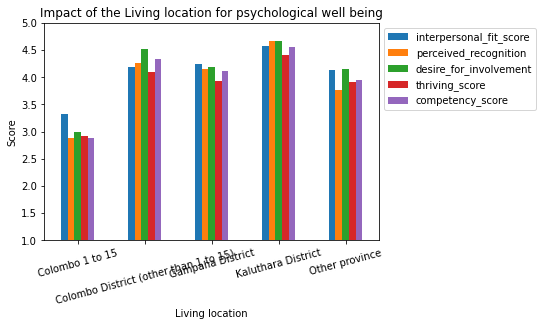

In [34]:
plotData('Living location')

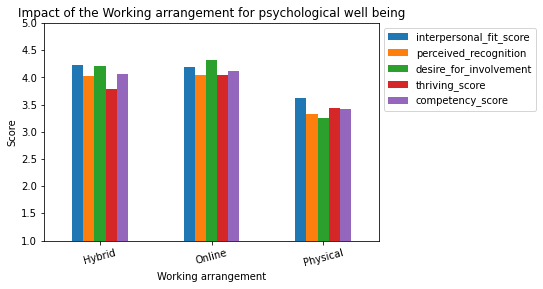

In [35]:
plotData('Working arrangement')

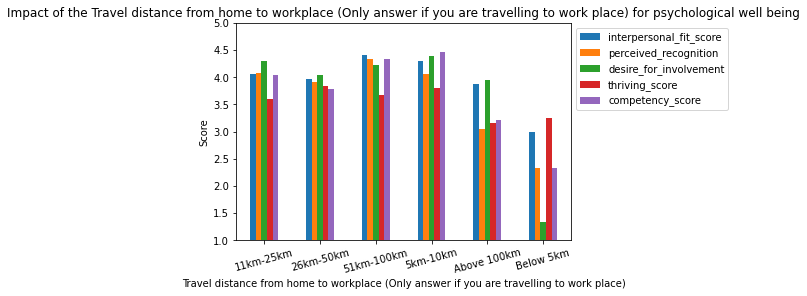

In [36]:
plotData('Travel distance from home to workplace (Only answer if you are travelling to work place)')

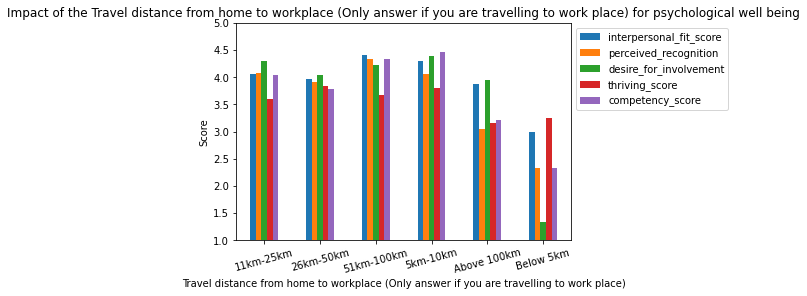

In [37]:
plotData('Travel distance from home to workplace (Only answer if you are travelling to work place)')

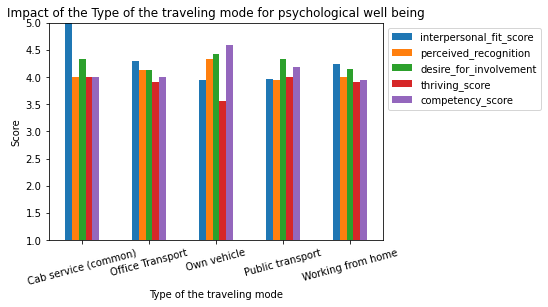

In [38]:
plotData('Type of the traveling mode')

In [39]:
s =groupbyAgei.T

In [40]:
s.index

Index(['interpersonal_fit_score', 'perceived_recognition',
       'desire_for_involvement', 'thriving_score', 'competency_score'],
      dtype='object')

In [41]:
s

Age,20 - 25 years,26 - 30 years,31 - 40 years
interpersonal_fit_score,4.038462,4.203488,4.000000
perceived_recognition,3.820513,4.023256,5.000000
desire_for_involvement,4.230769,4.201550,4.666667
thriving_score,4.096154,3.906977,3.250000
competency_score,3.974359,4.085271,4.333333
